# 엑셀 파일 불러오기

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
origin = pd.read_csv('0818_SH_AND2.csv')
origin.columns

Index(['0.362', ' 0.0', ' 0.0.1', ' 0.0.2', ' 0.0.3', ' 0.0.4', ' 0.0.5',
       ' 0.0.6', ' 0.0.7', ' 0.0.8', ' 0.0.9', ' 0.0.10', ' 0.0.11', ' 0.0.12',
       ' 0.0.13', ' 0.0.14', ' 0.0.15', ' 0.0.16', ' 0.0.17', ' 0.0.18',
       ' 0.0.19', ' 0.0.20', ' 0.0.21', ' 0.0.22', ' 0.0.23', ' 0.0.24',
       ' 0.0.25', ' 0.0.26', ' 0.0.27', ' 0.0.28', ' 0.0.29', ' 0.0.30',
       ' 0.0.31', ' '],
      dtype='object')

In [3]:
origin_columns = []
for i in range(34):
    origin_columns.append(i)
origin.columns = origin_columns

In [4]:
origin = origin.rename(columns = {0: 'Time'})
for i in range(1, 33):
    num = i//2
    if i%2 == 1:
        origin = origin.rename(columns = {i: 'HbO2.'+str(num+16)})
    else:
        origin = origin.rename(columns = {i: 'HbR.'+str(num+15)})
#origin = origin[: 'HbR.15']

In [5]:
origin = origin.loc[:, :"HbR.31"]
origin_sliced = origin[origin.Time>=15.1]

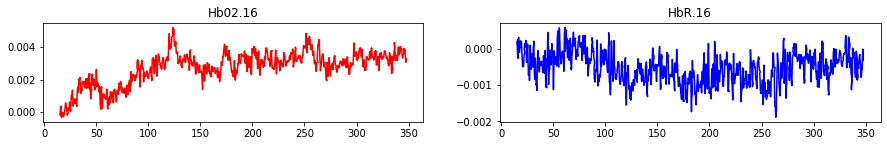

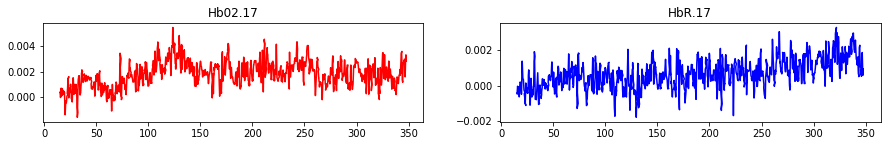

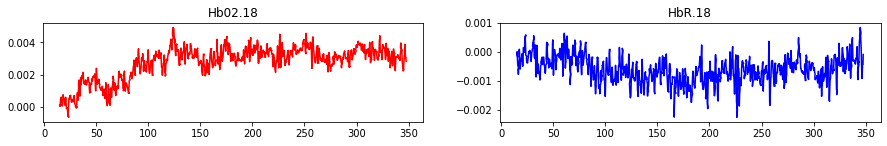

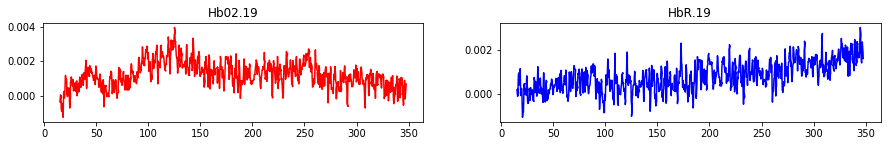

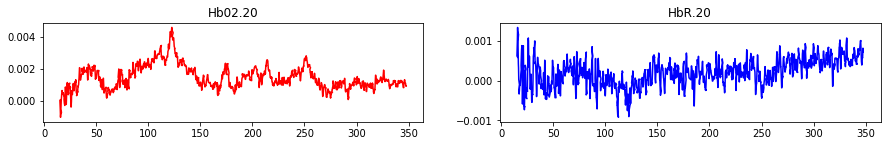

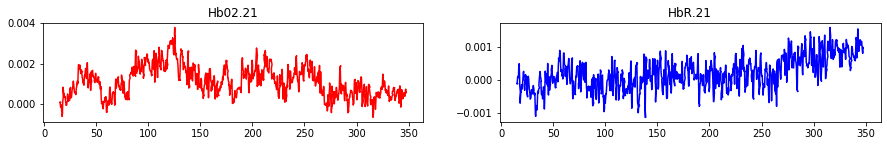

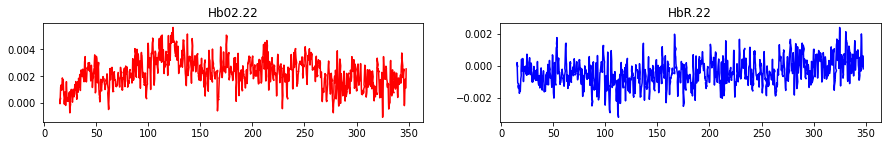

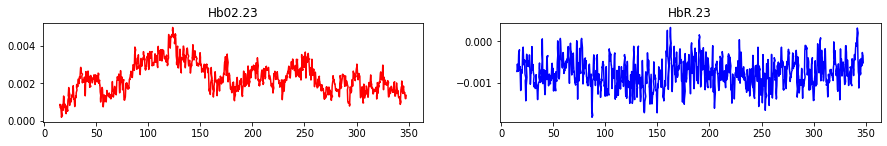

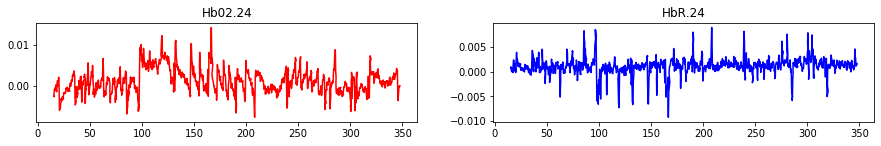

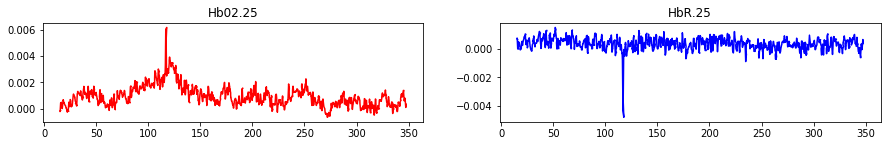

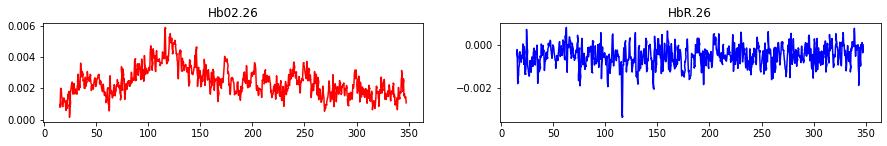

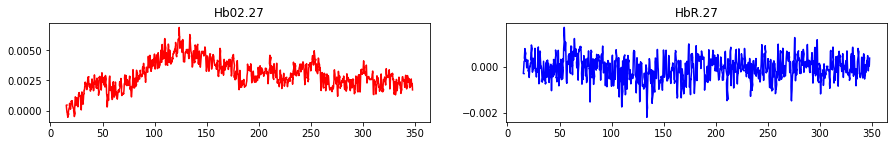

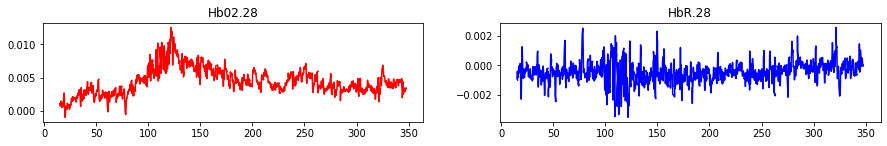

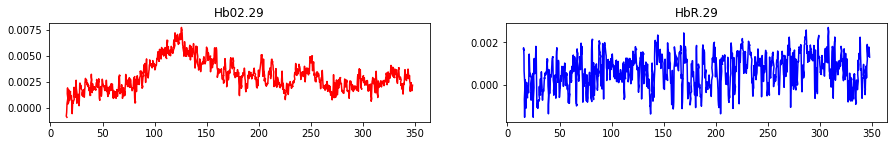

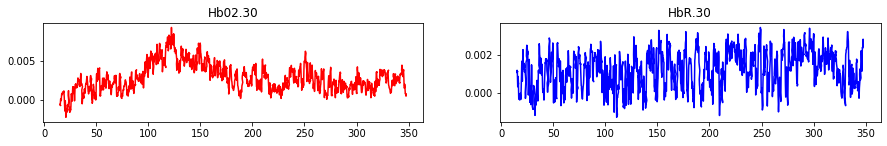

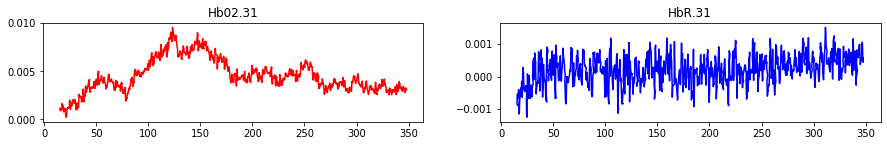

In [6]:
%matplotlib inline
for i in range(16,32):
    plt.figure(figsize=[400, 4])
    plt.subplot(2,49,i+1)
    plt.title('Hb02.'+str(i))
    plt.plot(origin_sliced['Time'], origin_sliced['HbO2.'+str(i)], color='r')
    
    plt.subplot(2,49,i+2)
    plt.title('HbR.'+str(i))
    plt.plot(origin_sliced['Time'], origin_sliced['HbR.'+str(i)], color='b')

# moving average

In [7]:
movinglpf = origin_sliced.rolling(window=10).mean()
movinglpf['Time']=origin_sliced['Time']
movinglpf

,Time,HbO2.16,HbR.16,HbO2.17,HbR.17,HbO2.18,HbR.18,HbO2.19,HbR.19,HbO2.20,...,HbO2.27,HbR.27,HbO2.28,HbR.28,HbO2.29,HbR.29,HbO2.30,HbR.30,HbO2.31,HbR.31
119,15.870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,15.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,15.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,15.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,15.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,15.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,15.821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,15.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,16.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,16.190,0.000086,-2.269729e-05,0.000242,-0.000279,0.000305,-0.000268,-0.000163,0.000066,-0.000487,...,0.000076,0.000026,0.001116,-0.000681,-0.000099,0.001129,-0.000373,0.000855,0.001016,-0.000673


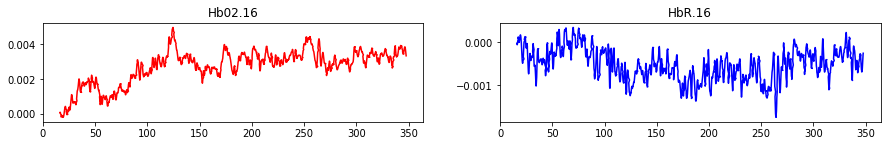

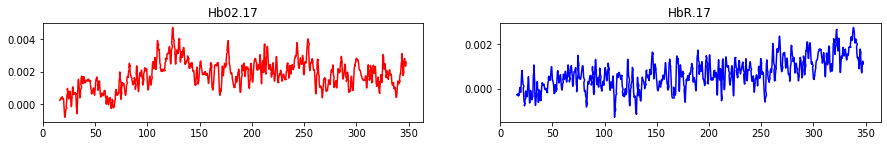

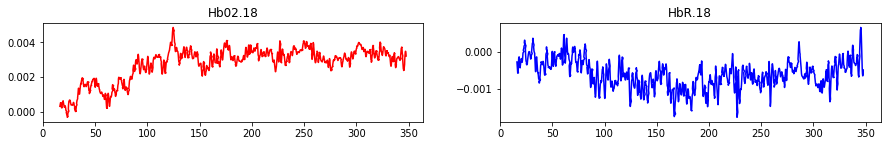

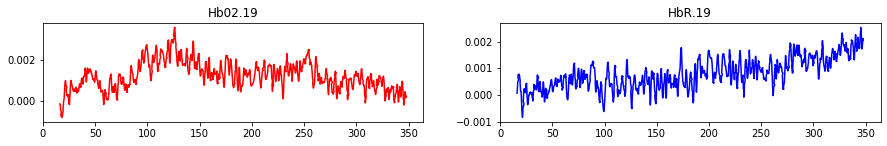

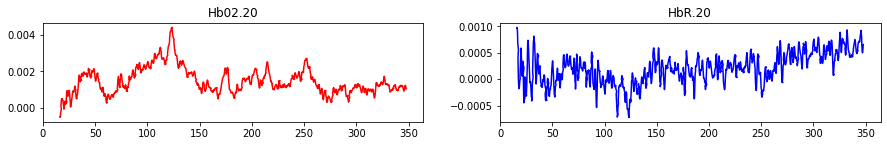

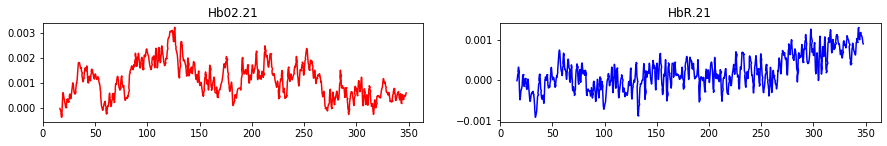

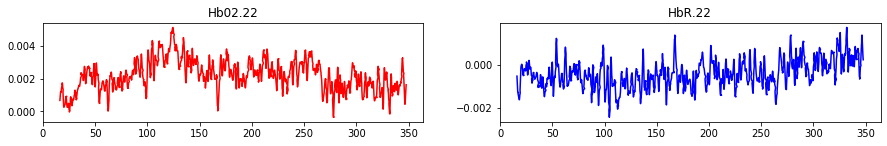

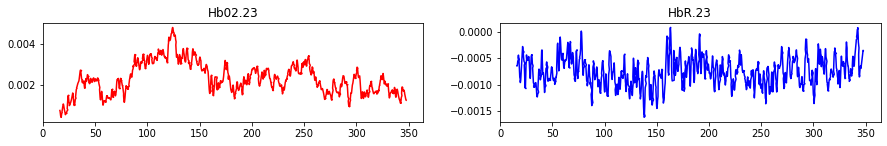

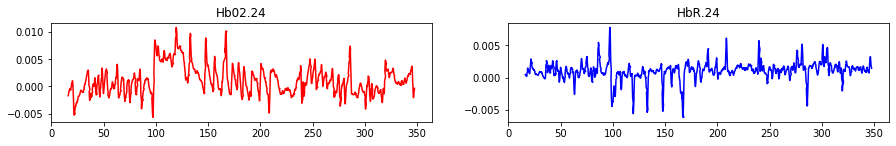

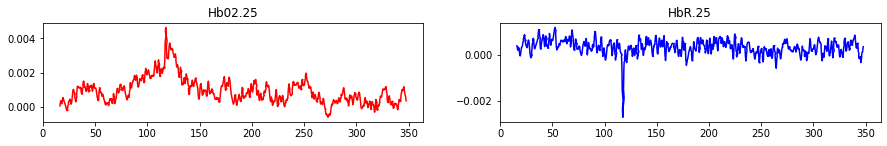

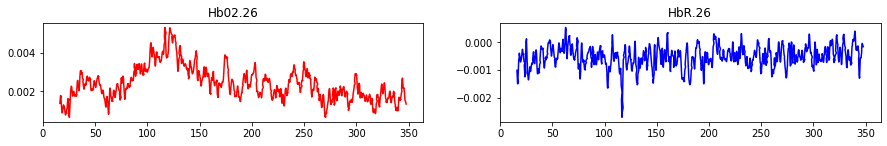

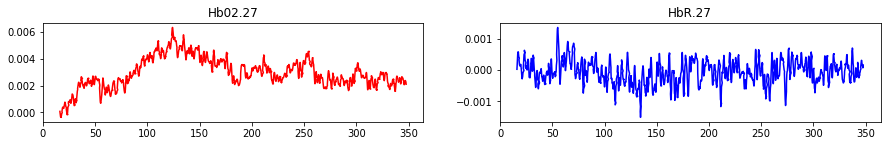

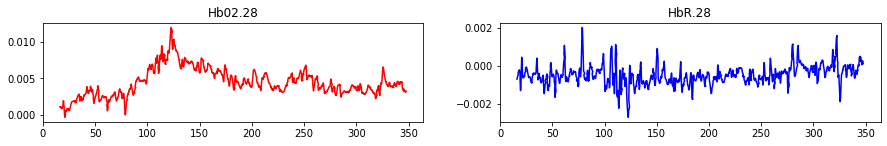

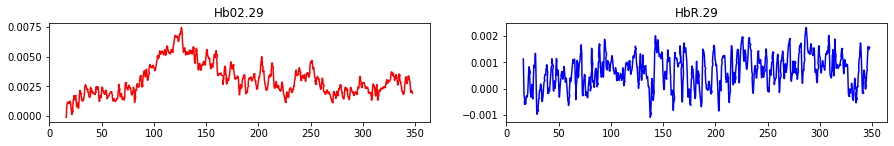

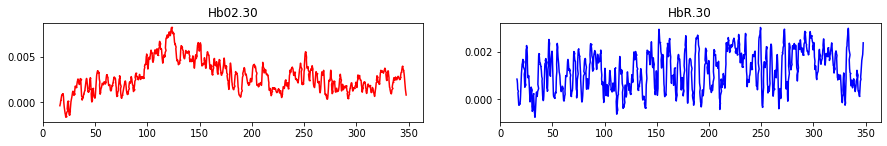

In [8]:
for i in range(16,31):
    plt.figure(figsize=[400, 4])
    plt.subplot(2,49,i+1)
    plt.title('Hb02.'+str(i))
    plt.plot(movinglpf['Time'], movinglpf['HbO2.'+str(i)], color='r')
    
    plt.subplot(2,49,i+2)
    plt.title('HbR.'+str(i))
    plt.plot(movinglpf['Time'], movinglpf['HbR.'+str(i)], color='b')

# 4개로 평균내기

In [9]:
merge = pd.DataFrame()
merge.insert(0, 'Time', movinglpf['Time'])
merge['ROI1'] = movinglpf['HbO2.16'] + movinglpf['HbO2.17'] + movinglpf['HbO2.20'] + movinglpf['HbO2.21'] / 4
merge['ROI2'] = movinglpf['HbO2.18'] + movinglpf['HbO2.19'] + movinglpf['HbO2.22'] + movinglpf['HbO2.23'] / 4 
merge['ROI3'] = movinglpf['HbO2.24'] + movinglpf['HbO2.25'] + movinglpf['HbO2.28'] + movinglpf['HbO2.29'] / 4
merge['ROI4'] = movinglpf['HbO2.26'] + movinglpf['HbO2.27'] + movinglpf['HbO2.30'] + movinglpf['HbO2.31'] / 4
merge = merge[merge.Time>=20]

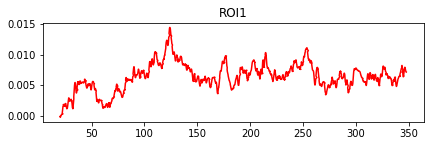

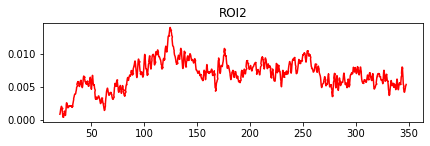

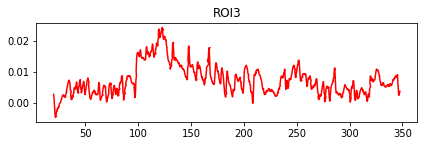

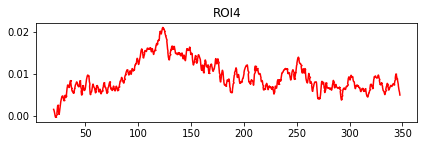

In [10]:
%matplotlib inline
for i in range(1,5):
    plt.figure(figsize=[400, 4])
    plt.subplot(2,49,i)
    plt.title('ROI'+str(i))
    plt.plot(merge['Time'], merge['ROI'+str(i)], color='r')

# 구간별 나누기

In [11]:
merge_baseline = pd.DataFrame()
merge_task1 = pd.DataFrame()
merge_task2 = pd.DataFrame()
merge_task3 = pd.DataFrame()

merge_baseline = merge[merge.Time>=20]
merge_baseline = merge_baseline[merge_baseline.Time<45]
merge_task1 = merge[merge.Time>=45]
merge_task1 = merge_task1[merge_task1.Time<120]
merge_task2 = merge[merge.Time>=145]
merge_task2 = merge_task2[merge_task2.Time<220]
merge_task3 = merge[merge.Time>=245]
merge_task3 = merge_task3[merge_task3.Time<320]

# 구간별 시각화

C:\Users\a0104\Anaconda\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\a0104\Anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\a0104\Anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earl

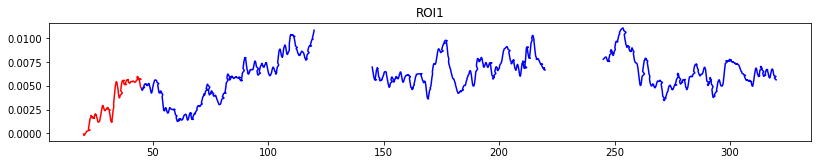

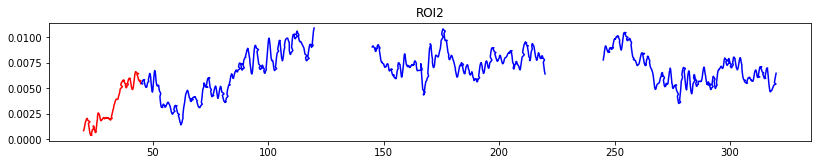

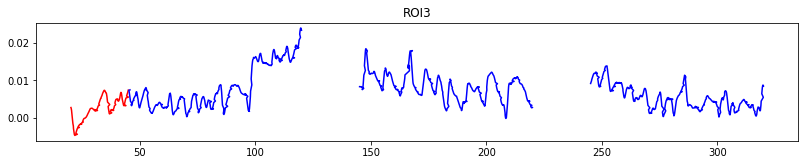

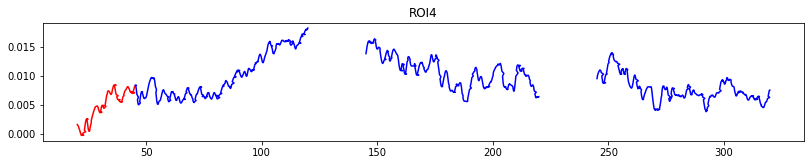

In [12]:
%matplotlib inline
for i in range(1,5):
    plt.figure(figsize=[800, 10])
    plt.subplot(4,49,i+1)
    plt.title('ROI'+str(i))
    plt.plot(merge_baseline['Time'], merge_baseline['ROI'+str(i)], color='r')
    
    plt.subplot(4,49,i+1)
    plt.title('ROI'+str(i))
    plt.plot(merge_task1['Time'], merge_task1['ROI'+str(i)], color='b')
    
    plt.subplot(4,49,i+1)
    plt.title('ROI'+str(i))
    plt.plot(merge_task2['Time'], merge_task2['ROI'+str(i)], color='b')
    
    plt.subplot(4,49,i+1)
    plt.title('ROI'+str(i))
    plt.plot(merge_task3['Time'], merge_task3['ROI'+str(i)], color='b')

# 전체 평균내기

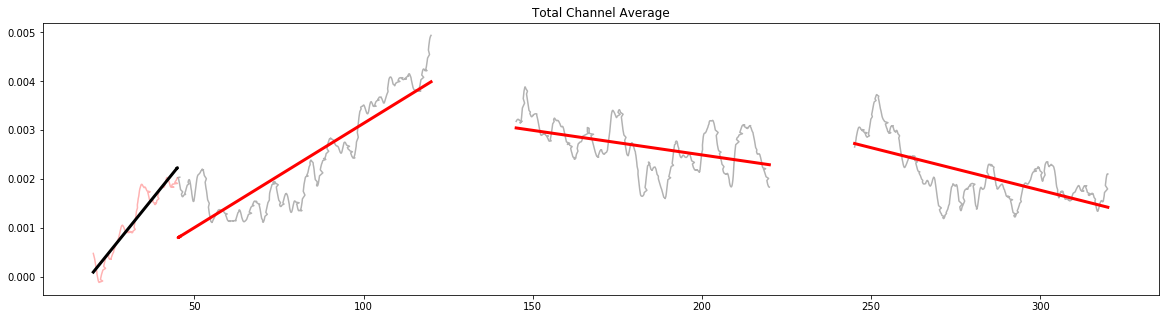

In [14]:
import numpy as np

merge = pd.DataFrame()
merge.insert(0, 'Time', movinglpf['Time'])
merge['total'] = movinglpf['HbO2.16']
for i in range(17, 32):
    merge['total'] = merge['total'] + movinglpf['HbO2.'+str(i)]
merge['total'] = merge['total']/ 16
merge = merge[merge.Time>=20]

merge_baseline = pd.DataFrame()
merge_task1 = pd.DataFrame()
merge_task2 = pd.DataFrame()
merge_task3 = pd.DataFrame()

merge_baseline = merge[merge.Time>=20]
merge_baseline = merge_baseline[merge_baseline.Time<45]
merge_task1 = merge[merge.Time>=45]
merge_task1 = merge_task1[merge_task1.Time<120]
merge_task2 = merge[merge.Time>=145]
merge_task2 = merge_task2[merge_task2.Time<220]
merge_task3 = merge[merge.Time>=245]
merge_task3 = merge_task3[merge_task3.Time<320]

np_merge_baseline = np.array(merge_baseline)
np_merge_task1 = np.array(merge_task1)
np_merge_task2 = np.array(merge_task2)
np_merge_task3 = np.array(merge_task3)

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

%matplotlib inline
plt.figure(figsize=[20, 5])
plt.title('Total Channel Average')
plt.plot(merge_baseline['Time'], merge_baseline['total'], color='r', alpha=0.3)
x = np_merge_baseline[:, 0]
y = np_merge_baseline[:, 1]
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), color='black', linewidth=3)

plt.plot(merge_task1['Time'], merge_task1['total'], color='black', alpha=0.3)
x = np_merge_task1[:, 0]
y = np_merge_task1[:, 1]
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), color='red', linewidth=3)

plt.plot(merge_task2['Time'], merge_task2['total'], color='black', alpha=0.3)
x = np_merge_task2[:, 0]
y = np_merge_task2[:, 1]
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), color='red', linewidth=3)

plt.plot(merge_task3['Time'], merge_task3['total'], color='black', alpha=0.3)
x = np_merge_task3[:, 0]
y = np_merge_task3[:, 1]
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), color='red', linewidth=3)